In [1]:
!pip install matplotlib

In [2]:
import json
import time
import matplotlib.pyplot as plt

def carregar_perguntas_json(caminho):
    with open(caminho, 'r', encoding='utf-8') as f:
        return json.load(f)

def rodar_quiz(perguntas, tempo_limite=15):
    pontuacao = 0
    respostas_certas = []
    respostas_erradas = []

    for i, q in enumerate(perguntas):
        print(f"\nPergunta {i+1}: {q['pergunta']}")
        for idx, opcao in enumerate(q['opcoes']):
            print(f"{idx}. {opcao}")

        inicio = time.time()
        resposta = None

        while True:
            try:
                resposta = int(input(f"Digite o número da resposta (tempo limite: {tempo_limite}s): "))
                if resposta < 0 or resposta >= len(q['opcoes']):
                    print("⚠️ Opção inválida. Tente novamente.")
                    continue
                break
            except ValueError:
                print("⚠️ Entrada inválida. Digite um número.")

            if time.time() - inicio > tempo_limite:
                print("⏱️ Tempo esgotado!")
                resposta = None
                break

        if resposta == q['resposta']:
            print("✅ Correto!")
            pontuacao += 1
            respostas_certas.append(q['pergunta'])
        else:
            print(f"❌ Errado! A resposta correta era: {q['opcoes'][q['resposta']]}")
            respostas_erradas.append(q['pergunta'])

    print(f"\nPontuação final: {pontuacao}/{len(perguntas)}")
    return pontuacao, respostas_certas, respostas_erradas


In [3]:
def mostrar_grafico(pontuacao, total):
    labels = ['Acertos', 'Erros']
    valores = [pontuacao, total - pontuacao]
    cores = ['green', 'red']

    plt.figure(figsize=(6, 4))
    plt.bar(labels, valores, color=cores)
    plt.title('Desempenho no Quiz')
    plt.ylabel('Número de perguntas')
    plt.show()


Pergunta 1: Qual linguagem é usada com o framework Django?
0. Java
1. Python
2. Ruby
3. C#


Digite o número da resposta (tempo limite: 15s):  2


❌ Errado! A resposta correta era: Python

Pergunta 2: Qual desses é um sistema de controle de versão?
0. Git
1. Docker
2. Linux
3. Node.js


Digite o número da resposta (tempo limite: 15s):  0


✅ Correto!

Pergunta 3: O que significa HTML?
0. HyperText Markup Language
1. HighText Machine Language
2. HyperTool Multi Language
3. None of the above


Digite o número da resposta (tempo limite: 15s):  1


❌ Errado! A resposta correta era: HyperText Markup Language

Pontuação final: 1/3


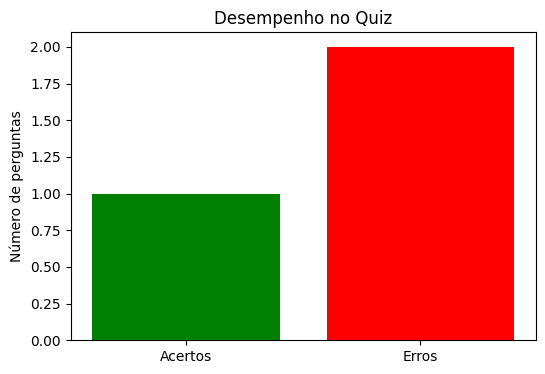

In [4]:
perguntas = carregar_perguntas_json('perguntas.json')
pontuacao, acertos, erros = rodar_quiz(perguntas)
mostrar_grafico(pontuacao, len(perguntas))